In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from datetime import datetime
import folium
from geopy.geocoders import Nominatim
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')


In [3]:
conn=sqlite3.connect('yelp.db')

In [4]:
tables= pd.read_sql_query("select name from sqlite_master where type='table'",conn)
tables

,name
0,business
1,review
2,user
3,tip
4,checkin


In [5]:
for table in  tables['name']:
    display(pd.read_sql_query(f"select * from {table} limit 5",conn))


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [6]:
pd.read_sql_query("select count(*) from business",conn)

,count(*)
0,150346


In [7]:
pd.read_sql_query("select business_id from business where lower(categories) like'%restaurant%'",conn)

,business_id
0,MTSW4McQd7CbVtyjqoe9mw
1,CF33F8-E6oudUQ46HnavjQ
2,k0hlBqXX-Bt0vf1op7Jr1w
3,bBDDEgkFA1Otx9Lfe7BZUQ
4,eEOYSgkmpB90uNA7lDOMRA
...,...
52281,l9eLGG9ZKpLJzboZq-9LRQ
52282,cM6V90ExQD6KMSU3rRB5ZA
52283,WnT9NIzQgLlILjPT0kEcsQ
52284,2O2K6SXPWv56amqxCECd4w


In [8]:
business_id=pd.read_sql_query("select business_id, review_count from business where lower(categories) like'%restaurant%' and is_open=1",conn)

In [9]:
pd.read_sql_query(f"""select avg(review_count),min(review_count),max(review_count),(select review_count from business order by review_count limit 1 offset (select count(*) from business)/2) as median_review_count,
avg(stars),min(stars),max(stars),(select stars from business order by stars limit 1 offset (select count(*) from business)/2) as median_star_rating
from  business 
where business_id IN {tuple(business_id['business_id'])};""",conn).transpose()

,0
avg(review_count),104.097789
min(review_count),5.000000
max(review_count),7568.000000
median_review_count,15.000000
avg(stars),3.523969
min(stars),1.000000
max(stars),5.000000
median_star_rating,3.500000


In [10]:
def remove_outliers(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3 - q1
    lower_bound = q1-1.5*iqr
    upper_bound = q3+1.5*iqr
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [11]:
business_id=remove_outliers(business_id,"review_count")

In [12]:
business_id.shape

(31537, 2)

In [13]:
pd.read_sql_query(f"""select avg(review_count),min(review_count),max(review_count),(select review_count from business order by review_count limit 1 offset (select count(*) from business)/2) as median_review_count,
avg(stars),min(stars),max(stars),(select stars from business order by stars limit 1 offset (select count(*) from business)/2) as median_star_rating
from  business 
where business_id IN {tuple(business_id['business_id'])};""",conn).transpose()

,0
avg(review_count),55.975426
min(review_count),5.000000
max(review_count),248.000000
median_review_count,15.000000
avg(stars),3.477281
min(stars),1.000000
max(stars),5.000000
median_star_rating,3.500000


In [14]:
pd.read_sql_query(f""" select name, sum(review_count) as review_count, avg(stars) as avg_rating from business where business_id in {tuple(business_id['business_id'])} group by name order by review_count desc limit 10 """,conn)

,name,review_count,avg_rating
0,McDonald's,16490,1.868702
1,Chipotle Mexican Grill,9071,2.381757
2,Taco Bell,8017,2.141813
3,Chick-fil-A,7687,3.377419
4,First Watch,6761,3.875000
5,Panera Bread,6613,2.661905
6,Buffalo Wild Wings,6483,2.344828
7,Domino's Pizza,6091,2.290210
8,Wendy's,5930,2.030159
9,Chili's,5744,2.514706


In [15]:
pd.read_sql_query(f""" select name, sum(review_count) as review_count, avg(stars) as avg_rating from business where business_id in {tuple(business_id['business_id'])} group by name order by avg_rating desc limit 10 """,conn)

,name,review_count,avg_rating
0,ā café,48,5.0
1,two birds cafe,77,5.0
2,the brewers cabinet production,13,5.0
3,taqueria la cañada,17,5.0
4,la bamba,44,5.0
5,la 5th av tacos,24,5.0
6,el sabor mexican and chinese food,21,5.0
7,eat.drink.Om...YOGA CAFE,7,5.0
8,d4 Tabletop Gaming Cafe,8,5.0
9,cabbage vegetarian cafe,12,5.0


In [16]:
pd.read_sql_query(""" select business_id,sum(length(date)-length(replace(date,',',''))+ 1) as checkin_count from checkin group by business_id """,conn) 

,business_id,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,11
1,--0iUa4sNDFiZFrAdIWhZQ,10
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,10
4,--7jw19RH9JKXgFohspgQw,26
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,67
131926,zznZqH9CiAznbkV6fXyHWA,1
131927,zzu6_r3DxBJuXcjnOYVdTw,23
131928,zzw66H6hVjXQEt0Js3Mo4A,2


pd.read_sql_query("",conn)

In [17]:
pd.read_sql_query(f""" select total.avg_rating as rating,
avg(total.review_count) as avg_review_count,
avg(total.checkin_count) as avg_checkin_count,
avg(total.tip_count) as avg_tip_count
from
(select
b.business_id,
sum(b.review_count) as review_count,
avg(b.stars) as avg_rating,
sum(length(cc.date)- length(replace(cc.date,',',''))+1) as checkin_count,
sum(tip.tip_count) as tip_count

from
business b
left join
checkin cc ON b.business_id=cc.business_id
left join
(select business_id, count(business_id) as tip_count from tip group by business_id order by tip_count) as tip on b.business_id = tip.business_id 
where b.business_id IN {tuple(business_id['business_id'])}
group by b.business_id) as total

group by total.avg_rating
""",conn) 

,rating,avg_review_count,avg_checkin_count,avg_tip_count
0,1.0,14.365079,17.518072,2.781513
1,1.5,24.358459,34.480969,3.884654
2,2.0,27.759629,52.386515,4.581058
3,2.5,36.631037,79.349429,6.325225
4,3.0,48.054998,105.970405,8.301950
5,3.5,63.730125,125.781702,10.320786
6,4.0,73.136954,127.139075,11.329362
7,4.5,65.282554,86.177605,8.995201
8,5.0,31.127979,27.545113,4.269082


In [18]:
review_count_df=pd.read_sql_query(f"""SELECT
    total.avg_rating AS rating,
    AVG(total.review_count) AS avg_review_count,
    AVG(total.checkin_count) AS avg_checkin_count,
    AVG(total.tip_count) AS avg_tip_count
FROM
    (SELECT
        b.business_id,
        SUM(b.review_count) AS review_count,
        AVG(b.stars) AS avg_rating,
        SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', '')) + 1) AS checkin_count,
        SUM(tip.tip_count) AS tip_count
    FROM
        business b
    LEFT JOIN
        checkin cc ON b.business_id = cc.business_id
    LEFT JOIN
        (SELECT business_id, COUNT(business_id) AS tip_count FROM tip GROUP BY business_id) AS tip ON b.business_id = tip.business_id
    WHERE
        b.business_id IN {tuple(business_id['business_id'])}
    GROUP BY
        b.business_id) AS total
GROUP BY
    total.avg_rating;
    """,conn)


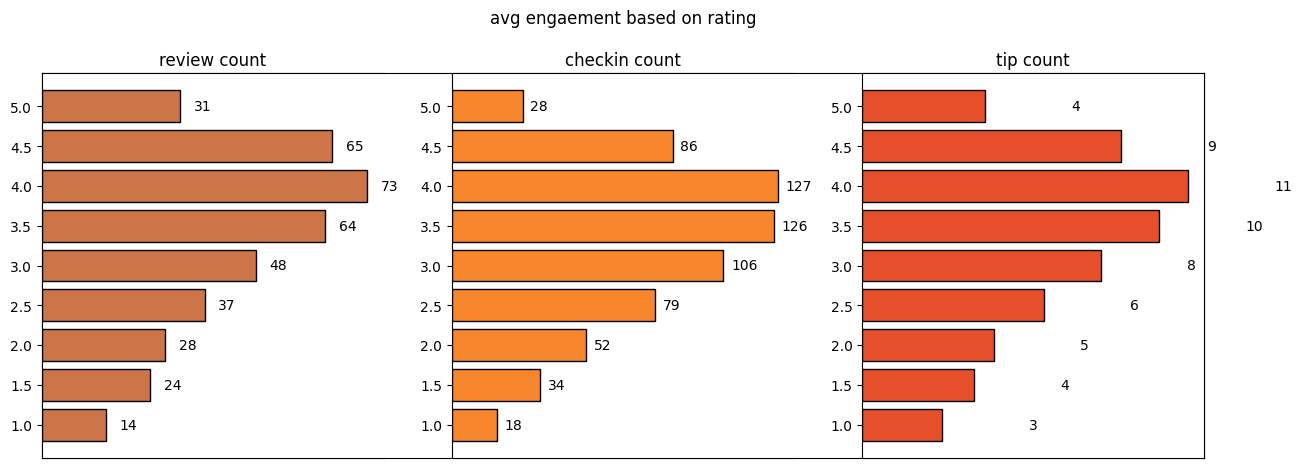

In [19]:
plt.figure(figsize=(15,5))
plt.title("avg engaement based on rating\n\n")
plt.yticks([])
plt.xticks([])
plt.subplot(1,3,1)
plt.title('review count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_review_count'],edgecolor='k', color ='#CB7548')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df['avg_review_count']):
    plt.text(value+3,i,str(round(value)),color='black',va='center')

plt.xticks([])
plt.subplot(1,3,2)
plt.title('checkin count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_checkin_count'],edgecolor='k', color ='#F8862c')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df['avg_checkin_count']):
    plt.text(value+3,i,str(round(value)),color='black',va='center')

plt.xticks([])
plt.subplot(1,3,3)
plt.title('tip count')
plt.barh(review_count_df['rating'].astype('str'), review_count_df['avg_tip_count'],edgecolor='k', color ='#E54F29')
for i, value in enumerate(review_count_df['avg_tip_count']):
    plt.text(value+3,i,str(round(value)),color='black',va='center')
plt.xticks([])
plt.show()    

In [20]:
engagement_df=pd.read_sql_query(f"""
select
b.business_id,
sum(b.review_count) as review_count,
avg(b.stars) as avg_rating,
sum(length(cc.date)- length(replace(cc.date,',',''))+1) as checkin_count,
sum(tip.tip_count) as tip_count,
(case when b.stars >= 3.5 then 'High-rated' else 'Low-Rated' end) as category

from
business b
left join
checkin cc ON b.business_id=cc.business_id
left join
(select business_id, count(business_id) as tip_count from tip group by business_id order by tip_count) as tip on b.business_id = tip.business_id 
where b.business_id IN {tuple(business_id['business_id'])}
group by b.business_id
""",conn).dropna()

In [21]:
engagement_df

,business_id,review_count,avg_rating,checkin_count,tip_count,category
0,---kPU91CF4Lq2-WlRu9Lw,24,4.5,11.0,4.0,High-rated
1,--0iUa4sNDFiZFrAdIWhZQ,14,3.0,10.0,6.0,Low-Rated
2,--epgcb7xHGuJ-4PUeSLAw,34,3.0,118.0,6.0,Low-Rated
4,--lqIzK-ZVTtgwiQM63XgQ,15,2.0,21.0,2.0,Low-Rated
5,-09Oc2D14vRnmirPh0vlXw,135,3.0,500.0,25.0,Low-Rated
...,...,...,...,...,...,...
31530,zzIF9qp2UoHN48EeZH_IDg,19,3.0,6.0,5.0,Low-Rated
31532,zzbZtgPYZS8sTIWQH6DwEw,86,3.0,292.0,17.0,Low-Rated
31533,zziDpuuJw-Km1J4BaGpBKA,6,3.5,20.0,2.0,High-rated
31534,zzjFdJwXuxBOGe9JeY_EMw,47,4.0,27.0,2.0,High-rated


In [22]:
engagement_df[['review_count','checkin_count','tip_count']].corr()

,review_count,checkin_count,tip_count
review_count,1.000000,0.626884,0.766321
checkin_count,0.626884,1.000000,0.772088
tip_count,0.766321,0.772088,1.000000


<Axes: >

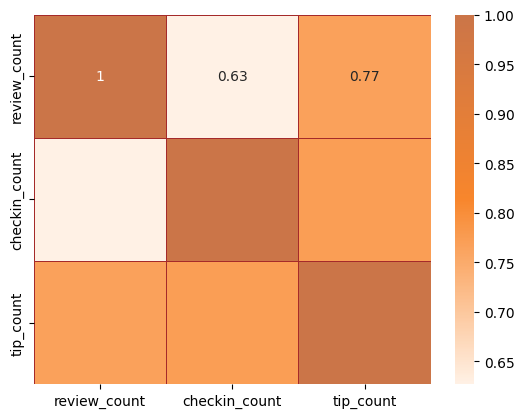

In [23]:
colors=['#FFF1E5','#F8862C','#CB7548']
custom_cmap=LinearSegmentedColormap.from_list('mycmap',colors)
sns.heatmap(engagement_df[['review_count','checkin_count','tip_count']].corr(),cmap=custom_cmap,annot=True,linewidths=0.5,linecolor='brown')

In [24]:
engagement_df.groupby("category")[['review_count','tip_count','checkin_count']].mean()

,review_count,tip_count,checkin_count
category,,,
High-rated,72.291062,10.162766,122.066641
Low-Rated,42.123420,6.541689,88.880828


In [25]:
def calculate_success_metric(df):
    success_score =[]
    for index, row in df.iterrows():
        score=row['avg_rating'] * np.log(row['review_count']+1)
        success_score.append(score)
    return success_score    

In [26]:
city_df=pd.read_sql_query(f"""select city, state, latitude,longitude,Avg(stars) as avg_rating, Sum(review_count) as review_count,
                  count(*) as restaurant_count
                  from business
                  where business_id IN {tuple(business_id['business_id'])}
                  group by state, city
                  order by review_count desc
                  limit 10""",conn)

city_df['success_score']= calculate_success_metric(city_df)

In [27]:
city_df

,city,state,latitude,longitude,avg_rating,review_count,restaurant_count,success_score
0,Philadelphia,PA,39.955505,-75.155564,3.532156,175487,3001,42.651934
1,Tampa,FL,27.890814,-82.502346,3.571429,104376,1715,41.270588
2,Indianapolis,IN,39.637133,-86.127217,3.412111,92639,1701,39.022521
3,Tucson,AZ,32.338572,-111.010760,3.386187,91613,1419,38.688341
4,Nashville,TN,36.208102,-86.768170,3.493590,87070,1404,39.737764
5,New Orleans,LA,29.963974,-90.042604,3.693676,69239,1012,41.167252
6,Saint Louis,MO,38.583223,-90.407187,3.414303,51490,811,37.042331
7,Reno,NV,39.476518,-119.784037,3.479626,48393,589,37.535187
8,Edmonton,AB,53.436403,-113.604288,3.509379,45916,1546,37.671748
9,Boise,ID,43.611192,-116.206275,3.558824,36104,561,37.346958


In [28]:

m=folium.Map(location= [city_df['latitude'].mean(), city_df["longitude"].mean()], zoom_start=4)



color_scale = folium.LinearColormap(colors=['green', 'yellow', '#E54F29'], vmin=city_df['success_score'].min(),vmax=city_df['success_score'].max())

for index, row in city_df.iterrows():

    folium.CircleMarker(

        location=[row['latitude'], row['longitude']], 
        radius=5, 
        color=color_scale(row['success_score']), 
        fill=True, 
        fill_color=color_scale(row['success_score']), 
        fill_opacity=0.7, 
        popup=f"Success Score: {row['success_score']}" ).add_to(m)

m.add_child(color_scale)

In [29]:
high_rated_engagement =pd.read_sql_query(f"""
select review.month_year, review.review_count, tip.tip_count 
from (
    select strftime('%m-%Y', date) as month_year, count(*) as review_count
    from review
    where business_id in {tuple(business_id['business_id'])} and stars >= 3.5
    group by month_year
    order by month_year 
    ) as review
join (
    Select avg(b.stars), strftime('%m-%Y', tip.date) as month_year,  count(*) as tip_count
    from tip
    join business as b on tip.business_id = b.business_id
    where tip.business_id in {tuple(business_id['business_id'])} and b.stars >= 3.5
    group by month_year
    order by month_year) as tip

on review.month_year = tip.month_year
;""",conn)

low_rated_engagement =pd.read_sql_query(f"""
select review.month_year, review.review_count,tip.tip_count 
from (
    select strftime('%m-%Y', date) as month_year, Count(*) as review_count
    from review
    where business_id in {tuple(business_id['business_id'])} and stars < 3.5
    group by month_year
    order by month_year) as review
join (
    Select avg(b.stars), strftime('%m-%Y', tip.date) as month_year,  count(*) as tip_count
    from tip
    join business as b on tip.business_id = b.business_id
    where tip.business_id in {tuple(business_id['business_id'])} and b.stars < 3.5
    group by month_year
    order by month_year) as tip

on review.month_year = tip.month_year
;""",conn)


In [30]:
high_rated_engagement = pd.read_sql_query(f"""
select review.month_year, review.review_count, tip.tip_count 
from (
    select strftime('%m-%Y', date) as month_year, count(*) as review_count
    from review
    where business_id in {tuple(business_id['business_id'])} and stars >= 3.5
    group by month_year
    order by month_year
) as review
join (
    select avg(b.stars),strftime('%m-%Y', tip.date) as month_year, count(*) as tip_count
    from tip
    join business as b on tip.business_id = b.business_id
    where tip.business_id in {tuple(business_id['business_id'])} and b.stars >= 3.5
    group by month_year
    order by month_year
) as tip
on review.month_year = tip.month_year
;""", conn)


low_rated_engagement = pd.read_sql_query(f"""
select review.month_year, review.review_count, tip.tip_count 
from (
    select strftime('%m-%Y', date) as month_year, count(*) as review_count
    from review
    where business_id in {tuple(business_id['business_id'])} and stars < 3.5
    group by month_year
    order by month_year
) as review
join (
    select avg(b.stars),strftime('%m-%Y', tip.date) as month_year, count(*) as tip_count
    from tip
    join business as b on tip.business_id = b.business_id
    where tip.business_id in {tuple(business_id['business_id'])} and b.stars < 3.5
    group by month_year
    order by month_year
) as tip
on review.month_year = tip.month_year
;""", conn)


In [31]:
high_rated_engagement

,month_year,review_count,tip_count
0,01-2010,1218,79
1,01-2011,2171,621
2,01-2012,3086,1321
3,01-2013,3801,1230
4,01-2014,4973,1357
...,...,...,...
149,12-2017,10161,1477
150,12-2018,12870,1163
151,12-2019,13756,1161
152,12-2020,11294,937


In [32]:
low_rated_engagement

,month_year,review_count,tip_count
0,01-2010,613,25
1,01-2011,1103,297
2,01-2012,1748,538
3,01-2013,2196,548
4,01-2014,2769,607
...,...,...,...
149,12-2017,5970,441
150,12-2018,7574,338
151,12-2019,7591,275
152,12-2020,5014,148


In [33]:
time_rating = pd.read_sql_query(f"""
 select strftime('%m-%Y', date) as month_year, AVG(stars) as avg_rating
from review
where business_id in {tuple(business_id['business_id'])} 
group by month_year
order by month_year;""",conn)

In [34]:
time_rating

,month_year,avg_rating
0,01-2006,4.000000
1,01-2007,3.897436
2,01-2008,3.603960
3,01-2009,3.690661
4,01-2010,3.724194
...,...,...
198,12-2017,3.613415
199,12-2018,3.608687
200,12-2019,3.665246
201,12-2020,3.833701


In [35]:
time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])
time_rating.sort_values('month_year',inplace=True)
time_rating = time_rating[time_rating['month_year']>'2017']

high_rated_engagement['month_year'] = pd.to_datetime(high_rated_engagement['month_year'])
high_rated_engagement.sort_values('month_year',inplace=True)
high_rated_engagement = high_rated_engagement[high_rated_engagement['month_year']>'2017']

low_rated_engagement['month_year'] = pd.to_datetime(low_rated_engagement['month_year'])
low_rated_engagement.sort_values('month_year',inplace=True)
low_rated_engagement = low_rated_engagement[low_rated_engagement['month_year']>'2017']

In [36]:
high_rated_engagement['avg_rating'] = time_rating['avg_rating'].values

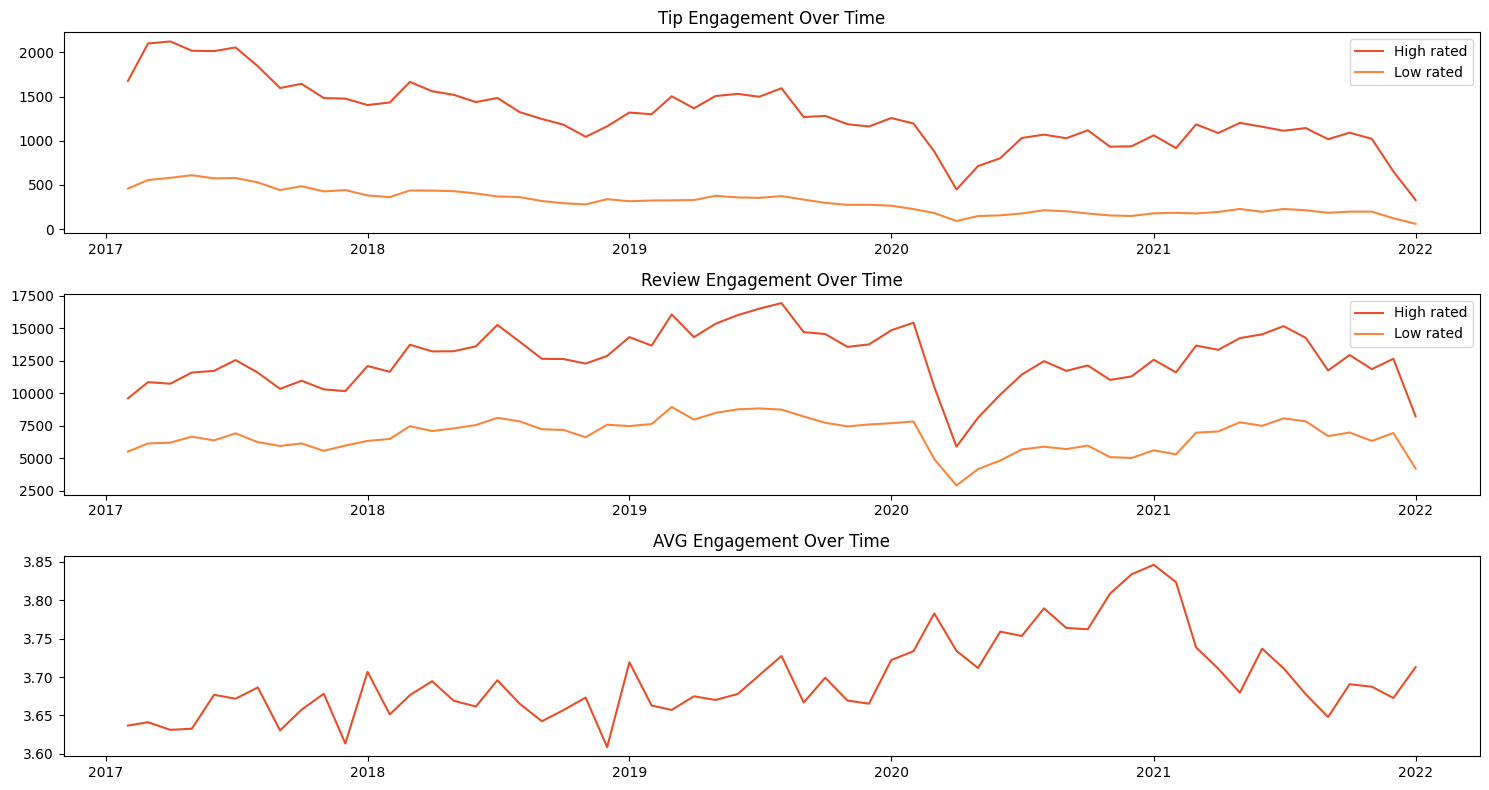

In [37]:
plt.figure(figsize=(15,8))
plt.subplot(3,1,1)
plt.title('Tip Engagement Over Time')
plt.plot(high_rated_engagement['month_year'],high_rated_engagement['tip_count'],label='High rated', color ='#E54F29')
plt.plot(low_rated_engagement['month_year'],low_rated_engagement['tip_count'],label='Low rated', color ='#F8863C')
plt.legend()

plt.subplot(3,1,2)
plt.title('Review Engagement Over Time')
plt.plot(high_rated_engagement['month_year'],high_rated_engagement['review_count'],label='High rated', color ='#E54F29')
plt.plot(low_rated_engagement['month_year'],low_rated_engagement['review_count'],label='Low rated', color ='#F8863C')
plt.legend()

plt.subplot(3,1,3)
plt.title('AVG Engagement Over Time')
plt.plot(high_rated_engagement['month_year'],high_rated_engagement['avg_rating'],label='High rated', color ='#E54F29')
plt.tight_layout()
plt.show()

In [38]:
tip_high_rated = high_rated_engagement[['month_year','tip_count']].set_index('month_year')
review_high_rated = high_rated_engagement[['month_year','review_count']].set_index('month_year')
rating_df = time_rating[['month_year','avg_rating']].set_index('month_year')

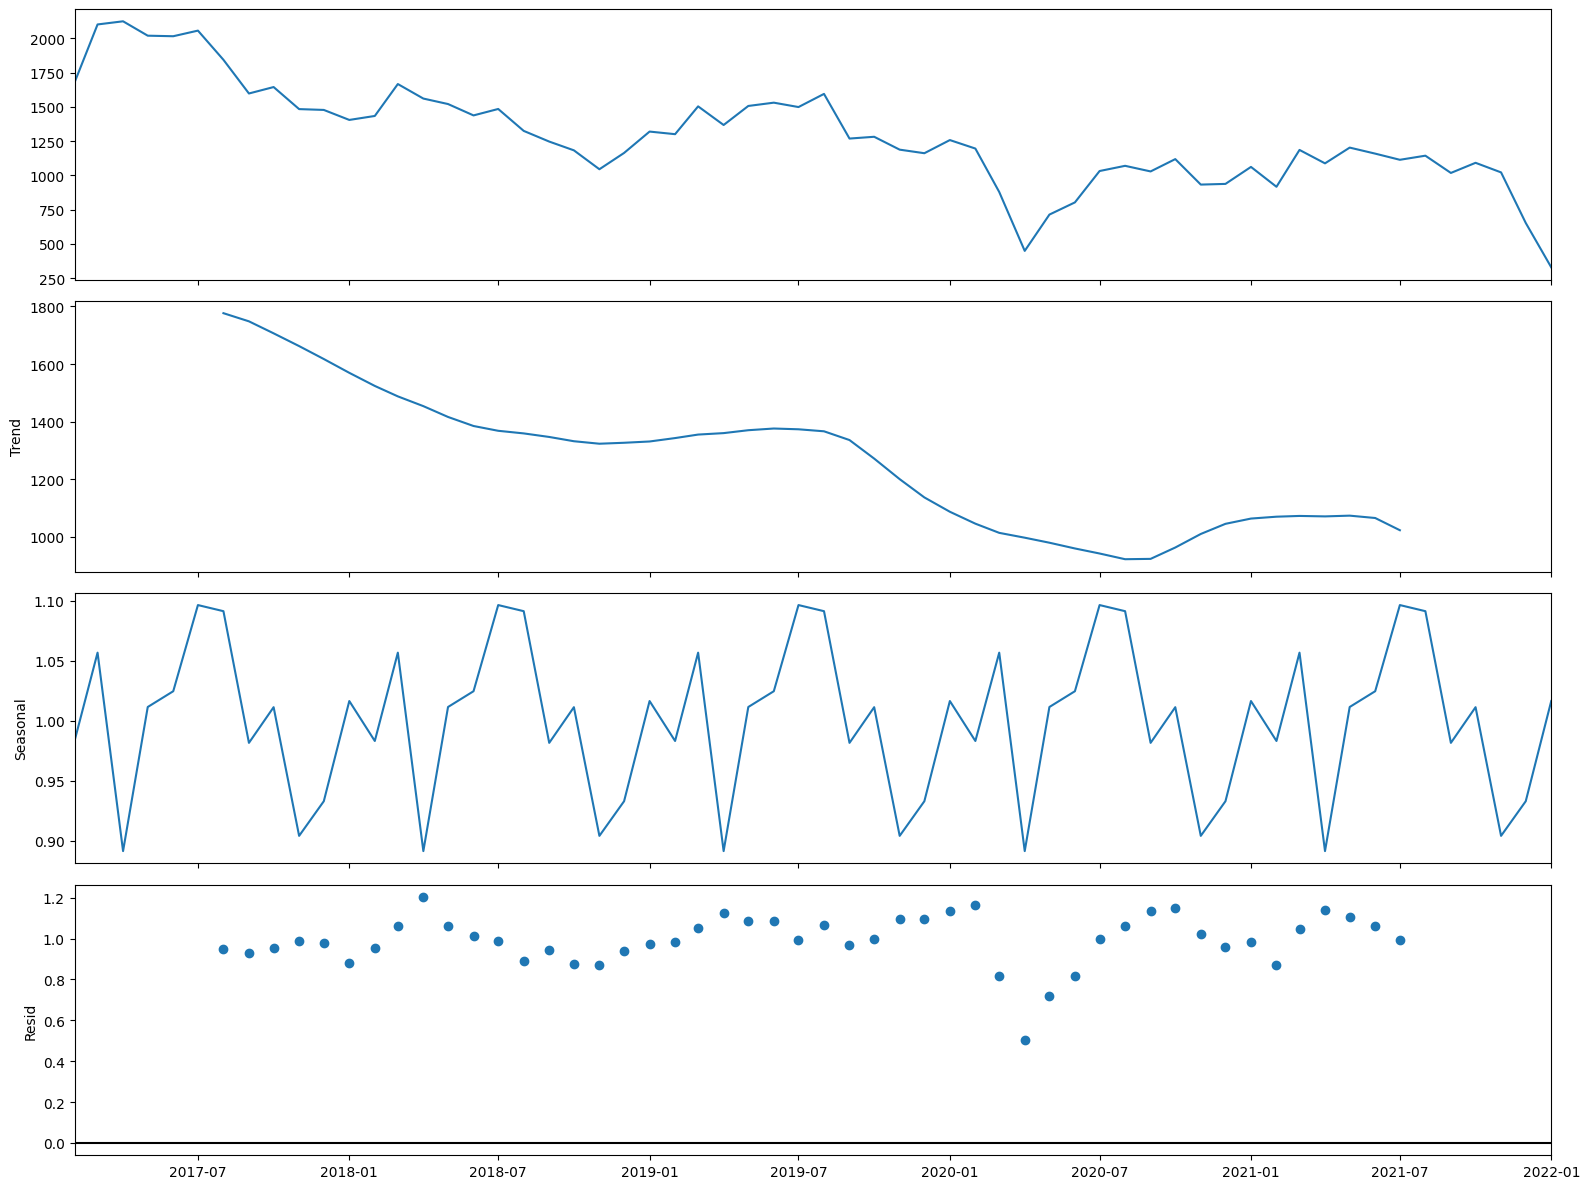

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition = seasonal_decompose(tip_high_rated,model='multiplicative',period =12)

plt.rcParams.update({'figure.figsize':(16,12)})

multiplicative_decomposition.plot()
plt.show()

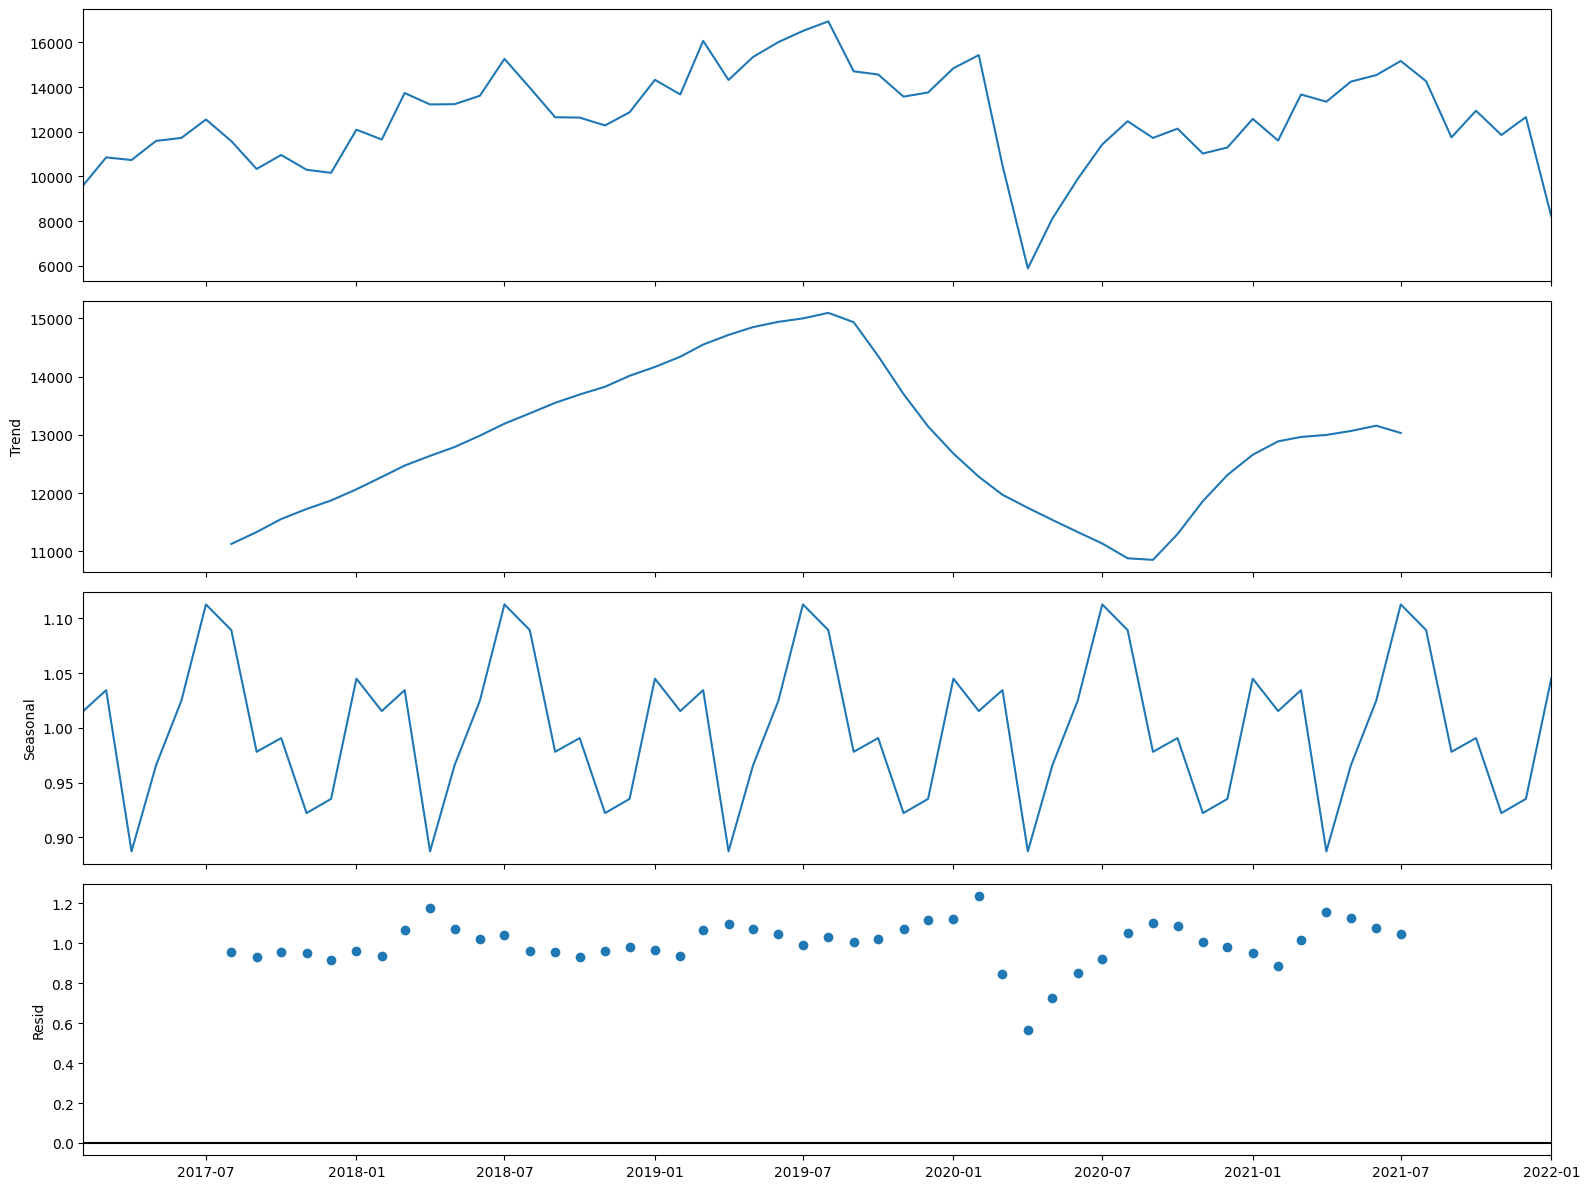

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition = seasonal_decompose(review_high_rated ,model='multiplicative',period =12)

plt.rcParams.update({'figure.figsize':(16,12)})

multiplicative_decomposition.plot()
plt.show()

In [41]:
pd.read_sql_query(f""" Select b.business_id, AVG(b.stars) as avg_rating, 
sum(b.review_count) as review_count,
sum(s.useful_count) as useful_count,
sum(s.funny_count) as funny_count,
sum(s.cool_count) as cool_count
from 
(select business_id,
    sum(useful) as useful_count,
    sum(funny) as funny_count,
    sum(cool) as cool_count
from review
group by business_id) as s
join business as b on b.business_id = s.business_id
                  
where b.business_id in {tuple(business_id['business_id'])}
group by b.business_id
order by review_count;""",conn)

,business_id,avg_rating,review_count,useful_count,funny_count,cool_count
0,-2CPhK6ik9ZBgFX_F-dkxQ,2.0,5,3,5,3
1,-3ArWZfDjfab8qVHf3WVtg,4.0,5,18,3,2
2,-4lNMmoW7gRxkH0c2dfXfA,4.0,5,1,0,0
3,-7UDKbg_8TL4LVuYR6Ooyw,3.0,5,3,0,2
4,-AzaeuPwxqFO4SMSKjbuCw,3.0,5,5,0,0
...,...,...,...,...,...,...
31532,nLyyTrxpEOdmNl9P95zXGA,4.0,248,185,50,117
31533,s3ZR7G5l-YN5fqms8vRSRw,4.0,248,107,34,75
31534,vxWjLZMn3uzDQyOjAdwq3w,3.5,248,189,55,110
31535,wPQWqLxY6t3-yRBNPPAmkQ,4.0,248,157,28,93


In [42]:
sentiment_df=pd.read_sql_query(f"""
SELECT b.business_id, 
       AVG(b.stars) AS avg_rating, 
       SUM(b.review_count) AS review_count,
       SUM(s.useful_count) AS useful_count,
       SUM(s.funny_count) AS funny_count,
       SUM(s.cool_count) AS cool_count
FROM business AS b
JOIN (
    SELECT business_id,
           SUM(useful) AS useful_count,
           SUM(funny) AS funny_count,
           SUM(cool) AS cool_count
    FROM review
    GROUP BY business_id
) AS s ON b.business_id = s.business_id
WHERE b.business_id IN {tuple(business_id['business_id'])}
GROUP BY b.business_id
ORDER BY review_count
""", conn)

sentiment_df = remove_outliers(sentiment_df,'review_count')
sentiment_df = remove_outliers(sentiment_df,'useful_count')
sentiment_df = remove_outliers(sentiment_df,'funny_count')
sentiment_df = remove_outliers(sentiment_df,'cool_count')

In [43]:
sentiment_df['success_score'] = calculate_success_metric(sentiment_df)

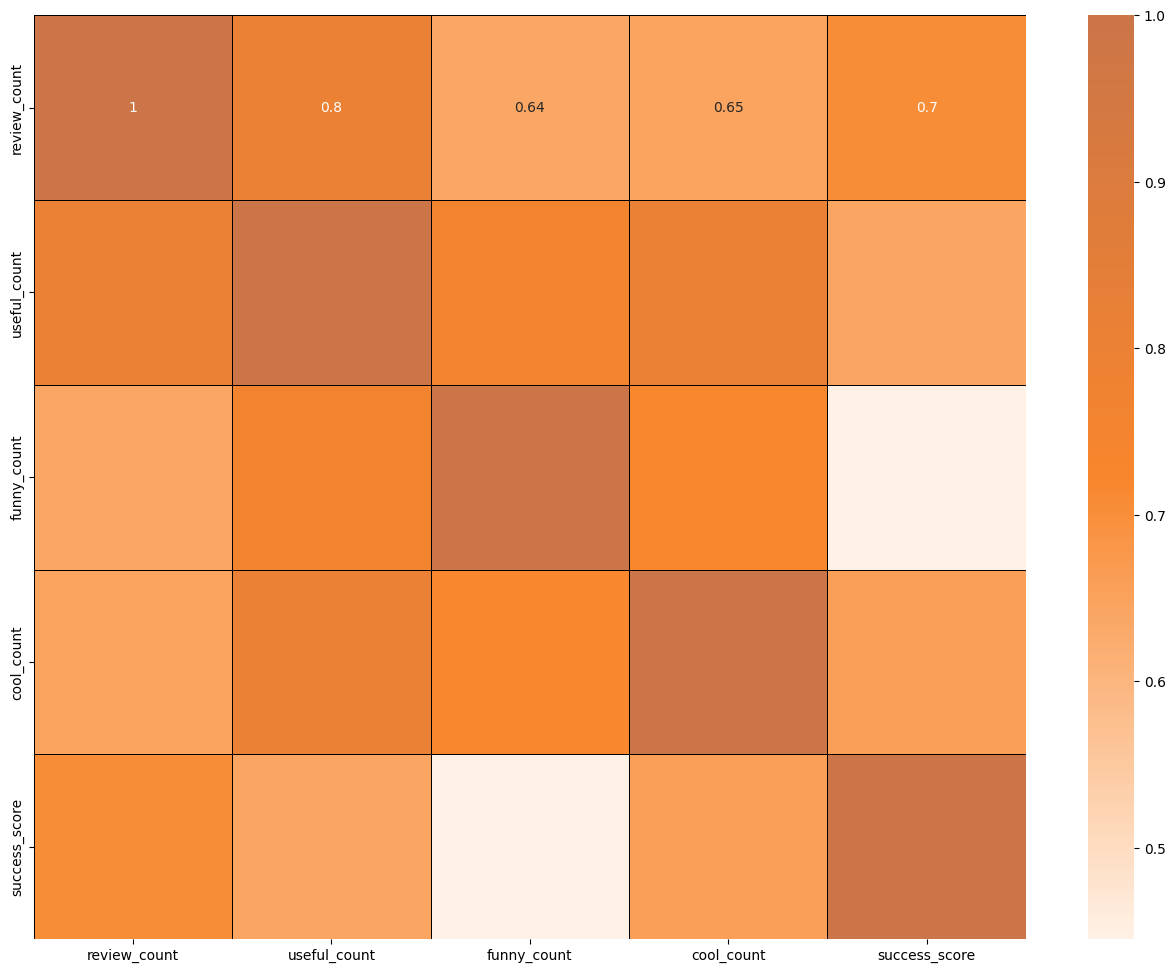

In [44]:
sns.heatmap(sentiment_df.iloc[:,2:].corr(),cmap=custom_cmap,annot= True, linewidths=0.5, linecolor='black')
plt.show()

In [45]:
elite_df = pd.read_sql_query("""
select elite, count(*) as num_users,
SUM(review_count) as total_review_count
from 
(select
 case
     when elite = '' then 'Not Elite'
     else 'Elite'
 end as elite,
 u.review_count
from user u) user_elite                                                                          
group by elite;""",conn)

In [46]:
elite_df

,elite,num_users,total_review_count
0,Elite,91198,20484441
1,Not Elite,1896699,26021235


([<matplotlib.patches.Wedge at 0x1a033062e50>,
 [Text(-1.0808203177091205, 0.204517580728788, 'Elite'),
  Text(1.0808203177091202, -0.20451758072878862, 'Not Elite')],
 [Text(-0.5895383551140656, 0.11155504403388436, '44.05'),
  Text(0.5895383551140655, -0.11155504403388469, '55.95')])

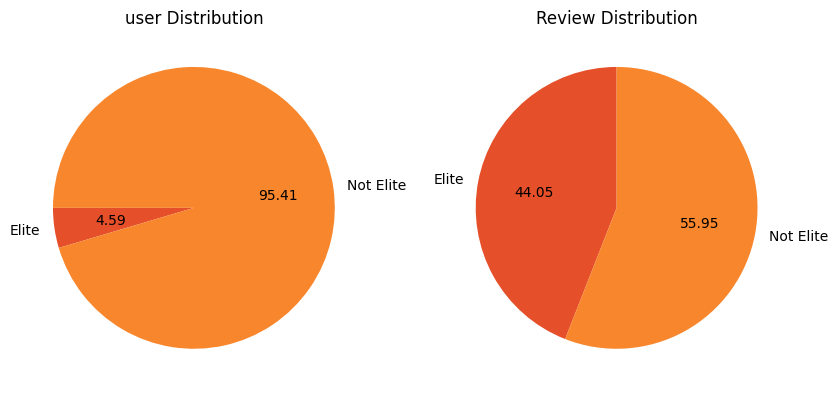

In [47]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('user Distribution')
plt.pie(elite_df['num_users'], labels=elite_df['elite'],autopct='%.2f', startangle =180, colors=['#E54F29','#F8862C'])

plt.subplot(1,2,2)
plt.title('Review Distribution')
plt.pie(elite_df['total_review_count'], labels=elite_df['elite'],autopct='%.2f', startangle =90, colors=['#E54F29','#F8862C'])

In [51]:
review_engagement = pd.read_sql_query(""" select 
                                      cast (strftime('%H',date) as integer)
                                      as hour,
                                      count(*) as review_count
                                      from review
                                      group by hour;""",conn)

tip_engagement = pd.read_sql_query(""" select 
                                      cast (strftime('%H',date) as integer)
                                      as hour,
                                      count(*) as tip_count
                                      from tip
                                      group by hour;""",conn)

checkin = pd.read_sql_query(""" select date from checkin""", conn)
checkin_engagement=[]
for i in checkin['date']:
    checkin_engagement.extend([datetime.strptime(j.strip(),"%Y-%m-%d %H:%M:%S").strftime("%H") for j in i.split(',')])

checkin_engagement= pd.DataFrame(checkin_engagement).astype('int').groupby(0)[[0]].count()

<function matplotlib.pyplot.show(close=None, block=None)>

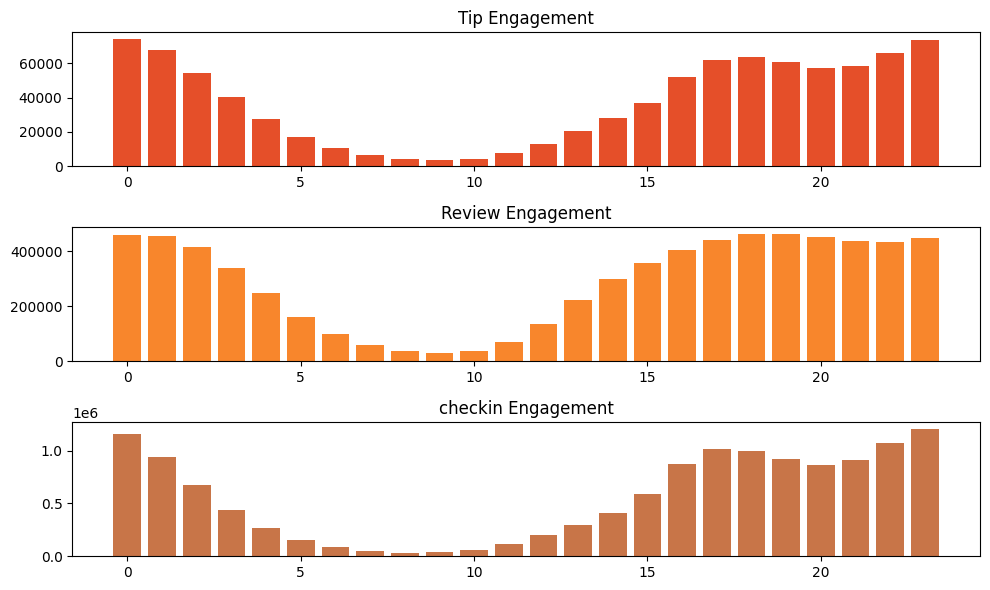

In [63]:
plt.figure(figsize=(10,6))
plt.subplot(3,1,1)
plt.title('Tip Engagement')
plt.bar(tip_engagement['hour'],tip_engagement['tip_count'],color='#E54F29')

plt.subplot(3,1,2)
plt.title('Review Engagement')
plt.bar(review_engagement['hour'],review_engagement['review_count'],color='#F8862C')

plt.subplot(3,1,3)
plt.title('checkin Engagement')
plt.bar(checkin_engagement.index,checkin_engagement[0],color='#C87548')

plt.tight_layout()
plt.show

